In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
training = pd.read_csv("/content/drive/My Drive/training.csv")
training.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [4]:
training = training.dropna()
training.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,22.361617,38.034571,56.147991,29.222304,79.617523,29.656570,39.272084,29.413747,15.761707,30.452947,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,2.768804,2.654903,2.819914,2.867131,3.312647,3.627187,2.609648,2.842219,3.337901,3.644342,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,11.054589,26.521633,35.581733,15.859361,55.549929,10.522325,25.060327,16.476000,3.826243,13.224453,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,20.631964,36.569765,54.562757,27.590944,77.732395,27.658656,37.555192,27.798773,13.540535,28.268263,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,22.529600,37.876900,56.239984,29.468466,79.797607,29.753523,39.247681,29.528098,15.760876,30.333323,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,24.202338,39.401034,57.926361,31.079433,81.559651,31.763791,40.824154,31.134740,17.871569,32.661300,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,40.050971,50.002113,67.752000,40.293408,94.269957,48.823425,51.300571,39.445859,39.676082,44.857962,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


In [5]:
training.shape

(2140, 31)

In [6]:
features_x = training.iloc[:,[i for i in range(0,len(training.columns)-1,2)]]
features_x.head()

,left_eye_center_x,right_eye_center_x,left_eye_inner_corner_x,left_eye_outer_corner_x,right_eye_inner_corner_x,right_eye_outer_corner_x,left_eyebrow_inner_end_x,left_eyebrow_outer_end_x,right_eyebrow_inner_end_x,right_eyebrow_outer_end_x,nose_tip_x,mouth_left_corner_x,mouth_right_corner_x,mouth_center_top_lip_x,mouth_center_bottom_lip_x
0,66.033564,30.227008,59.582075,73.130346,36.356571,23.452872,56.953263,80.227128,40.227609,16.356379,44.420571,61.195308,28.614496,43.312602,43.130707
1,64.332936,29.949277,58.856170,70.722723,36.034723,24.472511,53.987404,78.634213,42.728851,16.865362,48.206298,56.421447,35.122383,46.684596,45.467915
2,65.057053,30.903789,59.412000,70.984421,37.678105,24.976421,55.742526,78.887368,42.193895,16.791158,47.557263,60.822947,33.726316,47.274947,47.274947
3,65.225739,32.023096,60.003339,72.314713,37.618643,25.307270,56.433809,77.910261,41.671513,20.458017,51.885078,65.598887,37.245496,50.303165,51.561183
4,66.725301,32.244810,58.565890,72.515926,36.982380,22.506110,57.249571,77.762945,38.035436,15.925870,43.299534,60.671411,31.191755,44.962748,44.227141


In [7]:
features_y = training.iloc[:,[i for i in range(1,len(training.columns)-1,2)]]
features_y.head()

,left_eye_center_y,right_eye_center_y,left_eye_inner_corner_y,left_eye_outer_corner_y,right_eye_inner_corner_y,right_eye_outer_corner_y,left_eyebrow_inner_end_y,left_eyebrow_outer_end_y,right_eyebrow_inner_end_y,right_eyebrow_outer_end_y,nose_tip_y,mouth_left_corner_y,mouth_right_corner_y,mouth_center_top_lip_y,mouth_center_bottom_lip_y
0,39.002274,36.421678,39.647423,39.969997,37.389402,37.389402,29.033648,32.228138,29.002322,29.647471,57.066803,79.970165,77.388992,72.935459,84.485774
1,34.970077,33.448715,35.274349,36.187166,34.361532,33.144443,28.275949,30.405923,26.146043,27.058860,55.660936,76.352000,76.047660,70.266553,85.480170
2,34.909642,34.909642,36.320968,36.320968,36.320968,36.603221,27.570947,32.651621,28.135453,32.087116,53.538947,73.014316,72.732000,70.191789,78.659368
3,37.261774,37.261774,39.127179,38.380967,38.754115,38.007903,30.929864,31.665725,31.049990,29.909343,54.166539,72.703722,74.195478,70.091687,78.268383
4,39.621261,38.042032,39.621261,39.884466,39.094852,38.305237,30.672177,31.737247,30.935382,30.672177,64.889521,77.523239,76.997301,73.707387,86.871166


In [0]:
images = training.iloc[:,-1].values
images = np.array([int(j) for i in images for j in i.split(' ')])
images = images/255.0

In [9]:
training.shape

(2140, 31)

In [10]:
training.iloc[:,:-1].min()

left_eye_center_x            47.835757
left_eye_center_y            23.832996
right_eye_center_x           18.922611
right_eye_center_y           24.773072
left_eye_inner_corner_x      41.779381
left_eye_inner_corner_y      27.190098
left_eye_outer_corner_x      52.947144
left_eye_outer_corner_y      26.250023
right_eye_inner_corner_x     24.112624
right_eye_inner_corner_y     26.250023
right_eye_outer_corner_x     11.054589
right_eye_outer_corner_y     26.521633
left_eyebrow_inner_end_x     35.581733
left_eyebrow_inner_end_y     15.859361
left_eyebrow_outer_end_x     55.549929
left_eyebrow_outer_end_y     10.522325
right_eyebrow_inner_end_x    25.060327
right_eyebrow_inner_end_y    16.476000
right_eyebrow_outer_end_x     3.826243
right_eyebrow_outer_end_y    13.224453
nose_tip_x                   24.472590
nose_tip_y                   41.558400
mouth_left_corner_x          43.869480
mouth_left_corner_y          57.023258
mouth_right_corner_x          9.778137
mouth_right_corner_y     

In [11]:
images = images.reshape(-1,96,96)
images.shape

(2140, 96, 96)

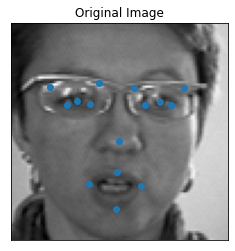

In [12]:
plt.imshow(images[10],cmap = "gray")
plt.scatter(features_x.iloc[10,:],features_y.iloc[10,:])
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
def blur(images):
  images_blur = []
  for image in images:
    image = cv2.blur(image,(4,4))
    images_blur.append(image)
  return np.array(images_blur)

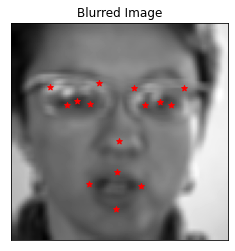

In [14]:
images =  blur(images)
plt.imshow(images[10],cmap='gray')
plt.scatter(features_x.iloc[10,:],features_y.iloc[10,:],color='red',marker='*')
plt.title("Blurred Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
y = np.array(training.iloc[:,:-1].values)
y = (y - 48)/48
y.shape

(2140, 30)

In [16]:
images = images.reshape(-1, 96,96,1)
images.shape

(2140, 96, 96, 1)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential

with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96, 1),padding="same"))
  model.add(MaxPooling2D(pool_size=2))

  model.add(Conv2D(filters=32, kernel_size=3, activation='relu',padding="same"))
  model.add(MaxPooling2D(pool_size=2))

  model.add(Conv2D(filters=64, kernel_size=3, activation='relu',padding="same"))
  model.add(MaxPooling2D(pool_size=2))

  model.add(Conv2D(filters=128, kernel_size=3, activation='relu',padding="same"))
  model.add(MaxPooling2D(pool_size=2))

  model.add(Conv2D(filters=256, kernel_size=3, activation='relu',padding="same"))
  model.add(MaxPooling2D(pool_size=2))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(30))
  model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])
  mod_fit = model.fit(images,y,epochs=60,batch_size=40)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 2140 samples
Epoch 1/60
2140/2140 [==============================] - 2s 1ms/sample - loss: 0.0171 - acc: 0.6093
Epoch 2/60
2140/2140 [==============================] - 1s 239us/sample - loss: 0.0051 - acc: 0.7047
Epoch 3/60
2140/2140 [==============================] - 1s 235us/sample - loss: 0.0048 - acc: 0.7028
Epoch 4/60
2140/2140 [==============================] - 1s 246us/sample - loss: 0.0046 - acc: 0.7051
Epoch 5/60
2140/2140 [==============================] - 1s 245us/sample - loss: 0.0045 - acc: 0.7047
Epoch 6/60
2140/2140 [==============================] - 0s 228us/sample - loss: 0.0043 - acc: 0.7051
Epoch 7/60
2140/2140 [==============================] - 1s 253us/sample - loss: 0.0041 - acc: 0.7051
Epoch 8/60
2140/2140 [==============================] - 1s 253us/sample - loss: 0.0038 - acc: 0.7075
Epoch 9/60
2140/2140 [==============================] - 1s 252us/sample - loss: 0.0034 - ac

In [0]:
model.save("facial.h5")

In [0]:
def plot_predicted_and_original(id):
  image = images.reshape(-1,96,96)[id]
  image = image.reshape(-1,96,96,1)
  predicted = model.predict(image)
  image = image.reshape(96,96)
  #predicted = scaleY.inverse_transform(predicted)
  predicted = (predicted*48)+48
  x2 = predicted[:,[i for i in range(0,30,2)]]
  y2 = predicted[:,[i for i in range(1,30,2)]]
  plt.subplot(121)
  plt.imshow(image,cmap="gray")
  plt.scatter(x2,y2)
  plt.title("Predicted")
  plt.subplot(122)
  plt.imshow(image,cmap="gray")
  plt.scatter(features_x.iloc[id,:],features_y.iloc[id,:])
  plt.title("Original")
  plt.show()

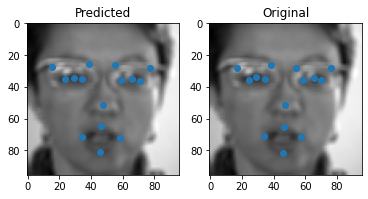

In [20]:
plot_predicted_and_original(10)